## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# CSV Data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Display original mouse dataset 

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Display original study results dataset

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine csv file dataframes into a single dataframe
study_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how='outer')

# Display the data table for preview
study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Drop Duplicates

# Create df with only necessary columns
mouse_demographic = study_data_df.loc[:,['Mouse ID', 'Timepoint']]
mouse_demographic.head()

# Use drop_duplicates to remove any rows with duplicate mouse ID & timepoint
study_data_cleaned = mouse_demographic.drop_duplicates()
study_data_cleaned

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [7]:
# Count of unique mice
mouse_count = mouse_demographic["Mouse ID"].nunique()

# Convert to dataframe
mouse_count_df = pd.DataFrame({"Total Unique Mice":[mouse_count]})

# Display mouse count dataframe
mouse_count_df

,Total Unique Mice
0,249


In [8]:
# Display duplicate (Mouse ID and Timepoint) mouse by ID number 

dup_mice_ID = study_data_df.loc[study_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [9]:
# Show data for the duplicate mouse ID

dup_mice_df = study_data_df.loc[study_data_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

clean_mice_df = study_data_df[study_data_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Number of mice in the clean DataFrame.
clean_mice = clean_mice_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume

drug_regimen_mean = clean_mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_regimen_median = clean_mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_regimen_variance = clean_mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_regimen_std = clean_mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_regimen_sem = clean_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe
drug_regimen_stats = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                   "Median Tumor Volume": drug_regimen_median,
                                   "Tumor Volume Variance": drug_regimen_variance,
                                   "Tumor Volume STD": drug_regimen_std,
                                   "Tumor Volume SEM": drug_regimen_sem})
                                  
# Clean and format data
drug_regimen_stats["Mean Tumor Volume"] = drug_regimen_stats["Mean Tumor Volume"].map("{:,.2f}".format)
drug_regimen_stats["Median Tumor Volume"] = drug_regimen_stats["Median Tumor Volume"].map("{:,.2f}".format)
drug_regimen_stats["Tumor Volume Variance"] = drug_regimen_stats["Tumor Volume Variance"].map("{:,.2f}".format) 
drug_regimen_stats["Tumor Volume STD"] = drug_regimen_stats["Tumor Volume STD"].map("{:,.2f}".format)
drug_regimen_stats["Tumor Volume SEM"] = drug_regimen_stats["Tumor Volume SEM"].map("{:,.2f}".format)   
                                  
# Display drug regimen dataframe
drug_regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Using the aggregation method, produce the same summary statistics from a single line of code

drug_regimen_agg = clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var',
                                                                                         'std', 'sem']).round(2)
drug_regimen_agg

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [13]:
# Generate a bar plot using both Pandas's DataFrame.plot() that shows the total number of measurements taken 
# for each treatment regimen throughout the course of the study

In [15]:
#Groupby drug regimen with .count and mouse id to determine the total measurement datapoints

regimen_data_points = clean_mice_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

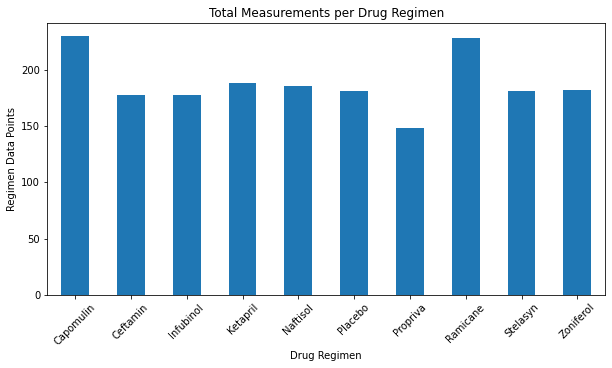

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

regimen_data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Data Points")

#show chart and set layout
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

#show legend
# 

(0.0, 241.5)

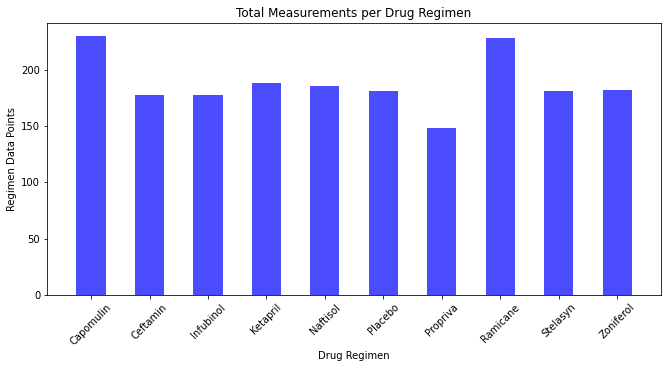

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot

regimens = clean_mice_df["Drug Regimen"].unique()
plt.figure(figsize=(11,5))
plt.bar(regimen_data_points.index.values, regimen_data_points.values, alpha=0.7, align="center", color='b', width=0.5)
plt.xticks(rotation=45)
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Data Points")
plt.xlim(-0.75,len(regimens)-0.25)
plt.ylim(0, max(regimen_data_points)*1.05)

# plt.legend("Drug Name")





In [17]:
# Distribution of female and male mice in the study

# Group by gender 
groupby_gender = clean_mice_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# Total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Percentage of female vs male
mouse_gender["Percentage of Sex"] = ((mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Format "Percentage of Sex" column
mouse_gender['Percentage of Sex'] = mouse_gender['Percentage of Sex'].map("{:,.2%}".format)

# Display gender distribution dataframe
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.60%
Male,125,50.40%


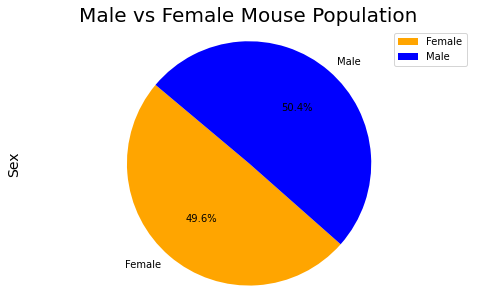

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['orange', 'blue']
plot = mouse_gender.plot.pie(y='Total Count',figsize=(8,5), colors = colors, startangle=140, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

# plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()

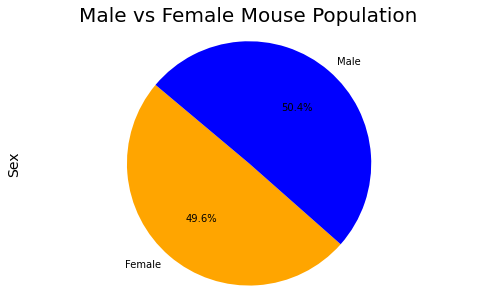

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.6,50.4]

#Set colors for each section of the pie
colors = ['orange', 'blue']

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%", startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis
plt.axis("equal")

# plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_mice_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_mice_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
